<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Data

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/jj.csv')

In [5]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 <a list of 84 Text major ticklabel objects>)

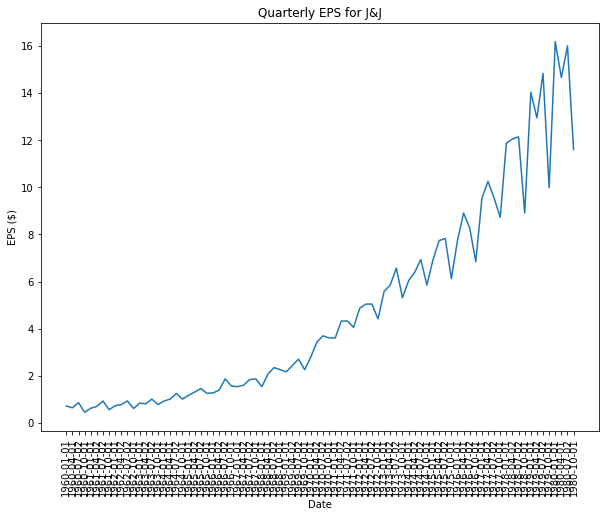

In [6]:
plt.plot(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)

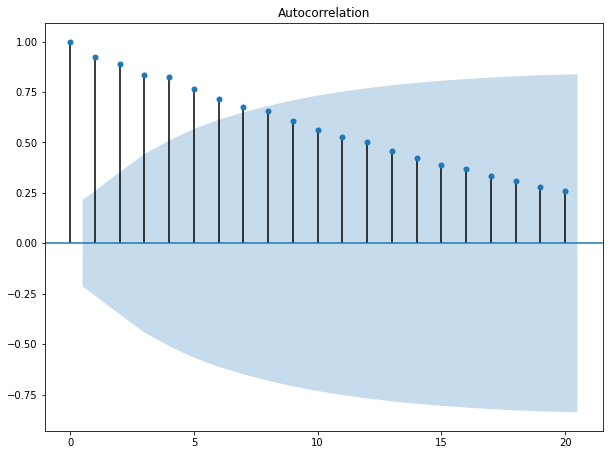

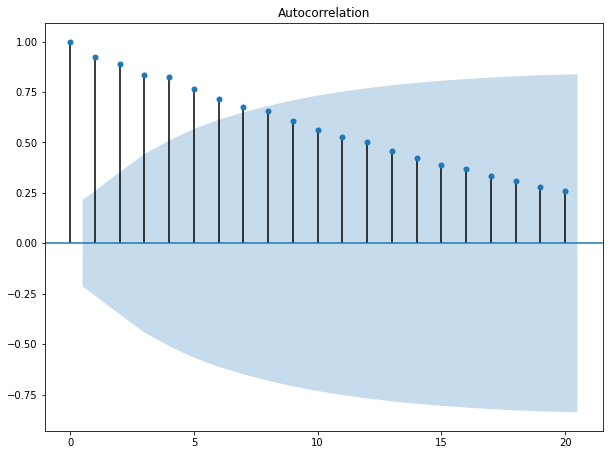

In [7]:
plot_acf(data['data'])

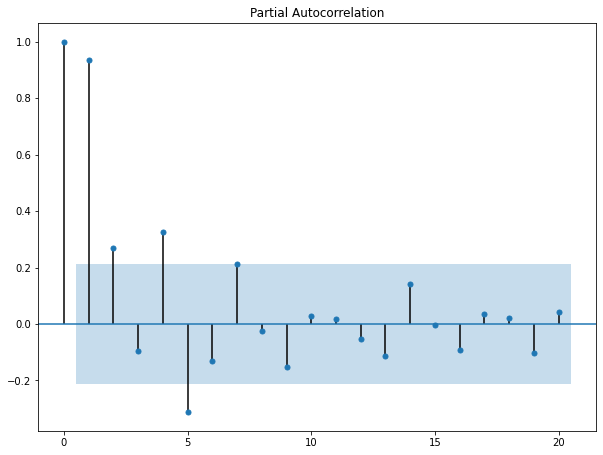

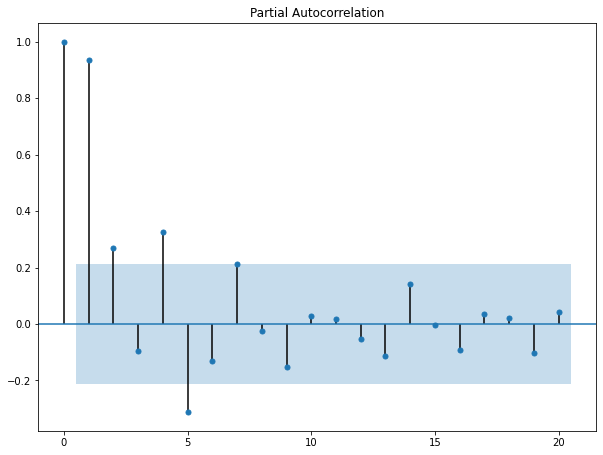

In [8]:
plot_pacf(data['data'])

In [9]:
data['data_tr_1'] = np.log(data['data'])
data['data_tr_1'] = data['data_tr_1'].diff()

In [10]:
data.head()

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684


Text(0.5, 1.0, 'Log difference of Quarterly EPS for J&J')

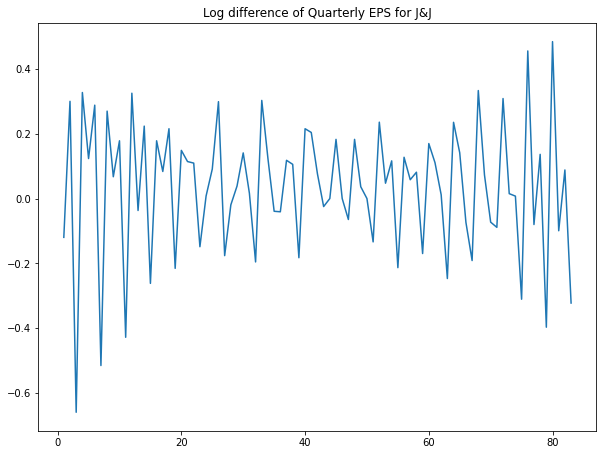

In [11]:
plt.plot(data['data_tr_1'])
plt.title('Log difference of Quarterly EPS for J&J')

In [12]:
ad_fuller_result = adfuller(data['data_tr_1'][1:])

In [14]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'P-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811839
P-value: 0.000414973140444062


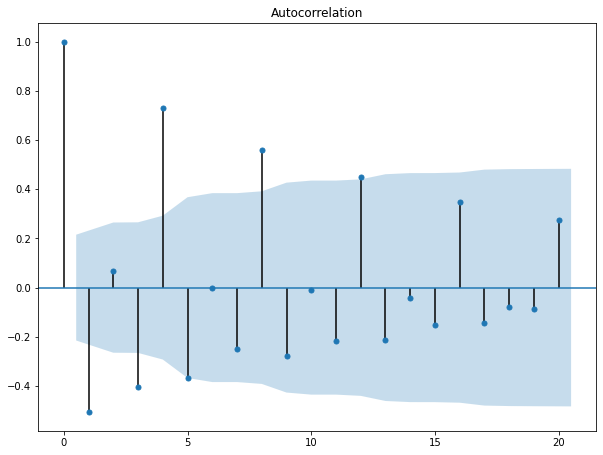

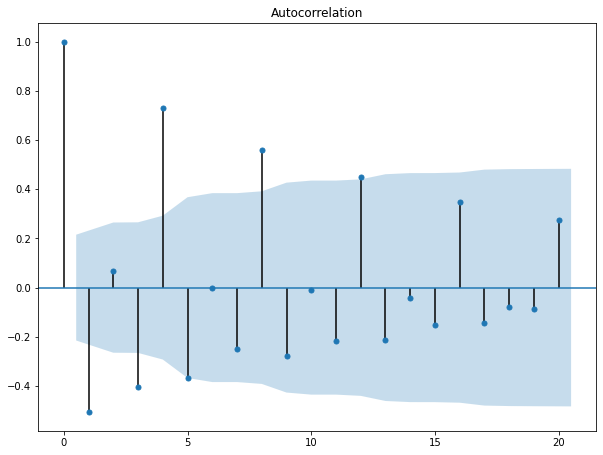

In [15]:
plot_acf(data['data_tr_1'][1:])

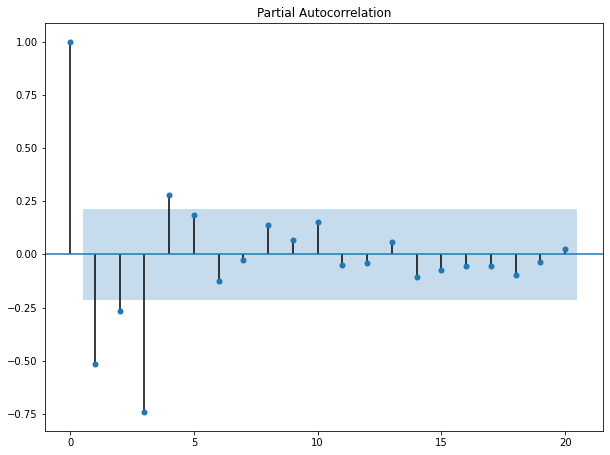

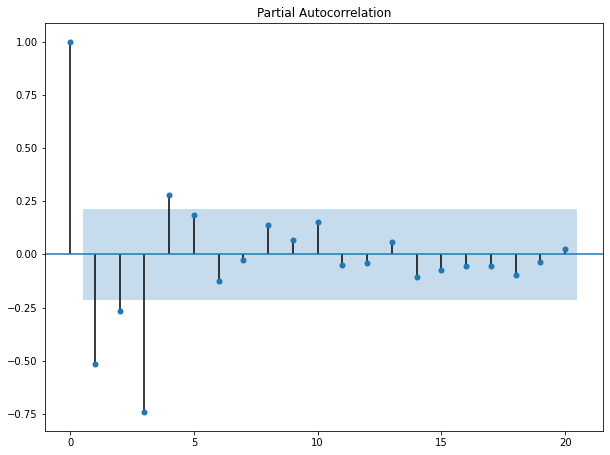

In [16]:
plot_pacf(data['data_tr_1'][1:])

In [17]:
def optimize_ARIMA(endog, order_list):

  """
  Returns a dataframe with parameters and corresponding AIC

  order_list - list with (p, d, q) tuples
  endog - the observed variable
  """

  results = []

  for order in tqdm_notebook(order_list):

    try:
      model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
    except:
      continue
    
    aic = model.aic

    results.append([order, model.aic])
  
  result_df = pd.DataFrame(results)
  result_df.columns = ['(p, d, q)', 'AIC']
  result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

  return result_df

In [28]:
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
  each = list(each)
  each.insert(1,1)
  each = tuple(each)
  order_list.append(each)

order_list[:10]

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1)]

In [29]:
result_df = optimize_ARIMA(data['data'], order_list)
result_df

  0%|          | 0/64 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(6, 1, 3)",115.814777
1,"(4, 1, 6)",115.859214
2,"(7, 1, 1)",116.057800
3,"(5, 1, 3)",116.535593
4,"(5, 1, 2)",117.230893
...,...,...
59,"(0, 1, 1)",265.481216
60,"(0, 1, 3)",265.497398
61,"(1, 1, 0)",266.632563
62,"(2, 1, 0)",267.751437


In [30]:
best_model = SARIMAX(data['data'], order=(6, 1, 3), simple_differencing=False)
res = best_model.fit(disp=False)
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                   data   No. Observations:                   84
Model:               SARIMAX(6, 1, 3)   Log Likelihood                 -47.907
Date:                Tue, 16 Aug 2022   AIC                            115.815
Time:                        12:32:44   BIC                            140.003
Sample:                             0   HQIC                           125.532
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4770      0.128    -11.510      0.000      -1.729      -1.225
ar.L2         -0.7751      0.146     -5.304      0.000      -1.061      -0.489
ar.L3          0.0364      0.057      0.634      0.5

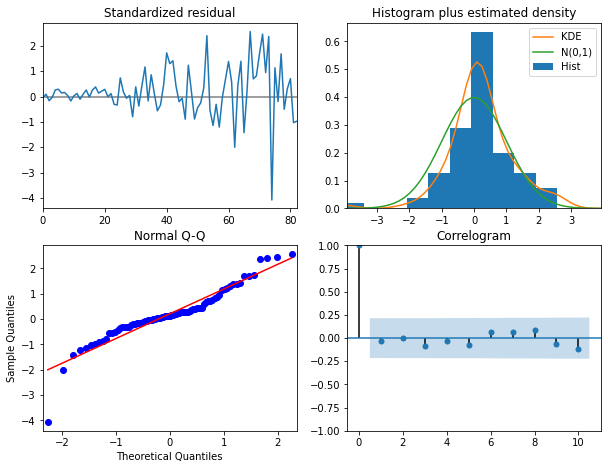

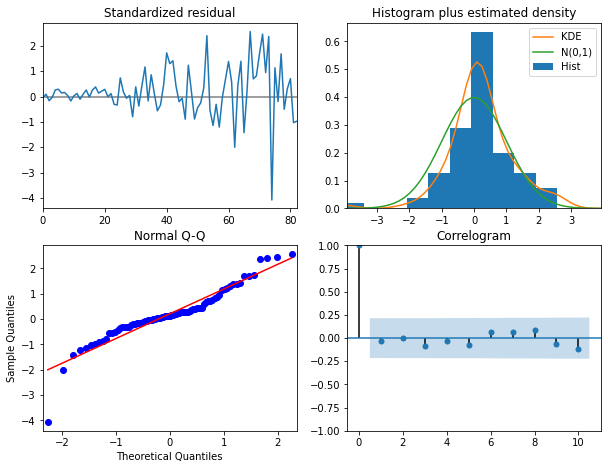

In [31]:
res.plot_diagnostics()

In [34]:
n_forecast = 8
predict = res.get_prediction(end=best_model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

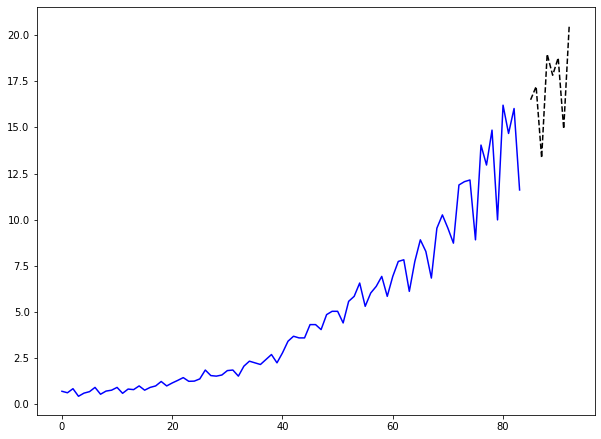

In [38]:
fig, ax = plt.subplots()
ax.plot(data['data'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

In [39]:
data['model'] = predict.predicted_mean

In [40]:
data.head()

,date,data,data_tr_1,model
0,1960-01-01,0.71,NaN,0.000000
1,1960-04-01,0.63,-0.119545,0.709998
2,1960-07-02,0.85,0.299517,0.677594
3,1960-10-01,0.44,-0.658462,0.722116
4,1961-01-01,0.61,0.326684,0.650025


In [41]:
mse = mean_squared_error(data['data'], data['model'])

In [43]:
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.16125926800459683
